In [ ]:
"""
Python 3.11 house_price_prediction
File name: house_price_prediction.ipynb

Version: 0.1
Author: xGino
Date: 16/04/2024
"""

# <a id='toc1_'></a>[Predict sales for the thousands of product families sold at Favorita stores located in Ecuador](#toc0_)

In this notebook, we're going to go use time-series forecasting to forecast store sales on data from Corporación Favorita, a large Ecuadorian-based grocery retailer. With the goal of predicting forcast on the product sales.

**Table of contents**<a id='toc0_'></a>    
- [Predict sales for the thousands of product families sold at Favorita stores located in Ecuador](#toc1_)    
  - [Problem definition](#toc1_1_)    
  - [Data](#toc1_2_)    
  - [Evaluation](#toc1_3_)    
  - [Features](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Problem definition](#toc0_)

> How well can we forcast the future sales of a product, given its characteristics and previous examples of how much similar have been sold for?

## <a id='toc1_2_'></a>[Data](#toc0_)

The data is dowloaded from the Kaggle Store Sales - Time Series Forecasting: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

**Datasets Overview:**

*1.* **Train.csv:**
   - Training set containing data up to the end of 2011.
   - Features include time series data of `store_nbr`, `family`, and `onpromotion`.
   - Target variable `sales` represents total sales for a product family at a particular store on a given date. Fractional values are possible.
   
*2.* **Valid.csv:**
   - Validation set containing data from January 1, 2012, to April 30, 2012.
   - Used for making predictions throughout most of the competition.
   - Your score on this set is utilized to generate the public leaderboard.
   
*3.* **Test.csv:**
   - Test set not released until the final week of the competition.
   - Contains data from May 1, 2012, to November 2012.
   - Your score on the test set determines your final rank for the competition.

**Additional Files:**

- **sample_submission.csv:**
  - A sample submission file in the correct format.
  
- **stores.csv:**
  - Store metadata including city, state, type, and cluster. 
  - Cluster represents a grouping of similar stores.
  
- **oil.csv:**
  - Daily oil prices inclusive of both train and test data timeframes. 
  - Ecuador's economic health is highly dependent on oil prices.
  
- **holidays_events.csv:**
  - Holidays and Events data with metadata.
  - Special attention is required for the `transferred` column which indicates holidays moved to another date by the government.
  - Additional holidays are days added to a regular calendar.
  

## <a id='toc1_3_'></a>[Evaluation](#toc0_)

The evaluation metric for this competition is the RMSLE  (Root Mean Squared Logarithmic Error).

For more on the evaluation of this project check: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

**Note:** The goal for most regression evaluation metrics is to minimize the error. Fir examokem our goal for this project will be to build a machine learning model wich minimise RMSLE.


## <a id='toc1_4_'></a>[Features](#toc0_)

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: Link to google sheet > cant find link. code page data dictionary

In [1]:
# Import all the tools wwe need
# Regular exploratory data analysis(EDA) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_histogram(df, column):
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(True)
    plt.show()

In [3]:
train_df = pd.read_csv("./data/train.csv", low_memory=False)
test_df = pd.read_csv("./data/test.csv", low_memory=False)

hollidays_df = pd.read_csv("./data/holidays_events.csv", low_memory=False)
store_df = pd.read_csv("./data/stores.csv", low_memory=False)
transaction_df = pd.read_csv("./data/transactions.csv", low_memory=False)
oil_df = pd.read_csv("./data/oil.csv", low_memory=False)

train_df.shape, test_df.shape, hollidays_df.shape, store_df.shape, transaction_df.shape, oil_df.shape

((3000888, 6), (28512, 5), (350, 6), (54, 5), (83488, 3), (1218, 2))

In [4]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


In [5]:
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


### Check dataset

TODO

-`[X]` Holiday + Store is merged
-`[X]` Transaction + oil is merged

Store per location... Holiday per Location/ Regional

Create Train df
Date0-xx, numstores, family??, TARGET:Sales, promo, transaction 

ID?? sales


Lets create 1 csv first, merge data together into 1 csv. 
holiday -> yes or no


transaction <- oil
transaction <- store
transaction <- holiday 

Train + Test Merge -> Create own df. 




### Merge Transaction with Oil DS

In [6]:
transaction_df.head(2)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111


In [7]:
oil_df.head(2)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14


In [8]:
transaction_df.shape, oil_df.shape

((83488, 3), (1218, 2))

In [9]:
transaction_oil_df = pd.merge(left=transaction_df, right=oil_df, on='date', how='left')
transaction_oil_df.rename(columns={'dcoilwtico': 'oil_price'}, inplace=True)
transaction_oil_df.shape

(83488, 4)

In [10]:
transaction_oil_df.head(2)

,date,store_nbr,transactions,oil_price
0,2013-01-01,25,770,NaN
1,2013-01-02,1,2111,93.14


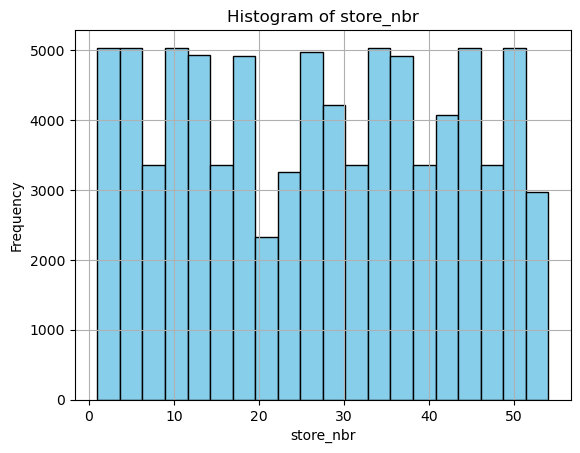

In [11]:
plot_histogram(transaction_oil_df, 'store_nbr')

### Merge Holliday and store together to get the holiday per store

In [12]:
hollidays_df.rename(columns={'locale_name': 'city'}, inplace=True)
hollidays_df.head(2)

,date,type,locale,city,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [13]:
short_store_df = store_df[['store_nbr', 'city']]
short_store_df.head(2)

,store_nbr,city
0,1,Quito
1,2,Quito


In [14]:
short_store_df.shape, hollidays_df.shape

((54, 2), (350, 6))

In [15]:
holiday_store_df = pd.merge(left=hollidays_df, right=short_store_df, on='city', how='left')
holiday_store_df.dropna(subset=['store_nbr', 'type'], inplace=True)
holiday_store_df.drop_duplicates(subset=['date', 'city', 'store_nbr'], keep='first', inplace=True)
holiday_store_df.drop(columns=['locale'], inplace=True)
holiday_store_df['store_nbr'] = holiday_store_df['store_nbr'].astype(int)
holiday_store_df.shape

(504, 6)

In [16]:
holiday_store_df

,date,type,city,description,transferred,store_nbr
0,2012-03-02,Holiday,Manta,Fundacion de Manta,False,52
1,2012-03-02,Holiday,Manta,Fundacion de Manta,False,53
3,2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,37
4,2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,39
5,2012-04-12,Holiday,Cuenca,Fundacion de Cuenca,False,42
...,...,...,...,...,...,...
699,2017-12-08,Transfer,Quito,Traslado Fundacion de Quito,False,46
700,2017-12-08,Transfer,Quito,Traslado Fundacion de Quito,False,47
701,2017-12-08,Transfer,Quito,Traslado Fundacion de Quito,False,48
702,2017-12-08,Transfer,Quito,Traslado Fundacion de Quito,False,49


In [17]:
### Merge 

In [18]:
transaction_oil_df.head(2)

,date,store_nbr,transactions,oil_price
0,2013-01-01,25,770,NaN
1,2013-01-02,1,2111,93.14


In [19]:
holiday_store_df.head(2)

,date,type,city,description,transferred,store_nbr
0,2012-03-02,Holiday,Manta,Fundacion de Manta,False,52
1,2012-03-02,Holiday,Manta,Fundacion de Manta,False,53


In [20]:
transaction_oil_df.shape, holiday_store_df.shape

((83488, 4), (504, 6))

In [28]:
merged_df = pd.merge(left=transaction_oil_df, right=holiday_store_df, on=['date', 'store_nbr'], how='left')
#merged_df['oil_price'] = merged_df['oil_price'].fillna(merged_df['oil_price'].rolling(window=11, min_periods=1, center=True).mean())
merged_df['oil_price'] = merged_df['oil_price'].interpolate(method='linear', limit_direction='both') # Fill missing Oil Price column


# Replace NaN values in 'type' column with 0, map existing values to integers, and fill NaN resulting from non-existent values with 0
merged_df['type'] = merged_df['type'].fillna(0).map({'Holiday': 1, 'Additional': 2, 'Transfer': 3}).fillna(0)
# Convert 'type' column to integer type
merged_df['type'] = merged_df['type'].astype(int)

merged_df.drop(columns=['city', 'description', 'transferred'], inplace=True) #drop description

merged_df.shape

(83488, 5)

In [29]:
merged_df['oil_price'].isna().value_counts()

oil_price
False    83488
Name: count, dtype: int64

In [30]:
merged_df.head(2)

,date,store_nbr,transactions,oil_price,type
0,2013-01-01,25,770,93.14,0
1,2013-01-02,1,2111,93.14,0


In [31]:
store_city_df = store_df[['city', 'store_nbr']]
store_city_df['store_nbr'] = store_city_df['store_nbr'].astype(int)
store_city_df.head()

C:\Users\gingg\AppData\Local\Temp\ipykernel_4848\3847808995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_city_df['store_nbr'] = store_city_df['store_nbr'].astype(int)


,city,store_nbr
0,Quito,1
1,Quito,2
2,Quito,3
3,Quito,4
4,Santo Domingo,5


In [32]:
final_df = merged_df.merge(store_city_df, on='store_nbr', how='left')
final_df.shape

(83488, 6)

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
city_encoder = LabelEncoder()

# Encode the 'city' column
final_df['city_encoded'] = city_encoder.fit_transform(final_df['city'])

In [56]:
final_df.head(2)

,date,store_nbr,transactions,oil_price,type,city,city_encoded
0,2013-01-01,25,770,93.14,0,Salinas,20
1,2013-01-02,1,2111,93.14,0,Quito,18


### Check Train Test DS

In [51]:
date = '2013-01-02'
store_number = 1

# Filter the DataFrame for the specified date and store number
final_dffiltered_df = final_df[(final_df['date'] == date) & (final_df['store_nbr'] == store_number)]

# Display all columns of the filtered DataFrame
final_dffiltered_df

,date,store_nbr,transactions,oil_price,type,city,city_encoded
1,2013-01-02,1,2111,93.14,0,Quito,18


In [36]:
train_df.shape, test_df.shape

((3000888, 6), (28512, 5))

In [63]:
family_encoder = LabelEncoder()

# Encode the 'family' column
train_df['family_encoded'] = family_encoder.fit_transform(train_df['family'])
test_df['family_encoded'] = family_encoder.fit_transform(test_df['family'])

In [64]:
train_df['sales'] = train_df['sales'].astype(int)
train_df.head(2)

,id,date,store_nbr,family,sales,onpromotion,city_encoded,family_encoded
0,0,2013-01-01,1,AUTOMOTIVE,0,0,0,0
1,1,2013-01-01,1,BABY CARE,0,0,1,1


In [65]:
test_df.head(2)

,id,date,store_nbr,family,onpromotion,city_encoded,family_encoded
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0,0
1,3000889,2017-08-16,1,BABY CARE,0,1,1


### Model building

In [69]:
from sklearn.model_selection import train_test_split

In [78]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day

In [79]:
# Select relevant features (X) and target variable (y)
X = train_df[['day', 'month', 'year', 'store_nbr', 'family_encoded', 'onpromotion']]
y = train_df['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400710, 6), (600178, 6), (2400710,), (600178,))

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [81]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Reshape input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [83]:
# Define LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

c:\Users\gingg\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
# Compile Model
model.compile(optimizer='adam', loss='mse')

# Train Model
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, verbose=3)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [88]:
# Evaluate Model
loss = model.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

18756/18756 ━━━━━━━━━━━━━━━━━━━━ 15s 774us/step - loss: 804000.2500
Test Loss: 821167.375


In [92]:
y_true = y_test

# Predict target values using the trained model
y_pred = model.predict(X_test_reshaped)

18756/18756 ━━━━━━━━━━━━━━━━━━━━ 16s 834us/step


In [90]:
def rmsle(y_true, y_pred):
    """
    Compute the Root Mean Squared Logarithmic Error (RMSLE) between the true and predicted values.
    
    Parameters:
        y_true (array-like): True target values.
        y_pred (array-like): Predicted target values.
    
    Returns:
        float: RMSLE score.
    """
    assert len(y_true) == len(y_pred), "Lengths of y_true and y_pred must be the same."
    squared_log_errors = (np.log1p(y_pred) - np.log1p(y_true)) ** 2
    mean_squared_log_error = np.mean(squared_log_errors)
    rmsle_score = np.sqrt(mean_squared_log_error)
    return rmsle_score

In [93]:
rmsle_score = rmsle(y_true, y_pred)
print(f'RMSLE Score: {rmsle_score}')

C:\Users\gingg\AppData\Local\Temp\ipykernel_4848\3550042197.py:13: RuntimeWarning: invalid value encountered in log1p
  squared_log_errors = (np.log1p(y_pred) - np.log1p(y_true)) ** 2


MemoryError: Unable to allocate 2.62 TiB for an array with shape (600178, 600178) and data type float64